In [59]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [60]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [61]:
len(x_train)
len(x_test)

10000

In [62]:
x_train[0].shape

(28, 28)

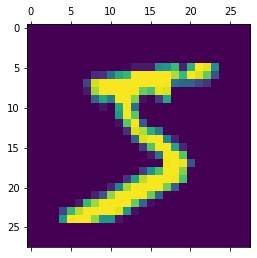

In [63]:
plt.matshow(x_train[0])

In [64]:
y_train[1]


0

In [65]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [66]:
#CONVERT THE DATA 2X2 DIMENSION ARRAY TO ONE DIMENSION ARRAY
x_train.shape


(60000, 28, 28)

In [67]:
x_train = x_train/255
x_test = x_test/255

In [68]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)

In [69]:
x_train_flattened.shape

(60000, 784)

In [70]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [71]:
x_test_flattened.shape

(10000, 784)

In [72]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [73]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [74]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)
    

    

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4674 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9262


In [75]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2654 - accuracy: 0.9247


[0.2654256224632263, 0.9247000217437744]

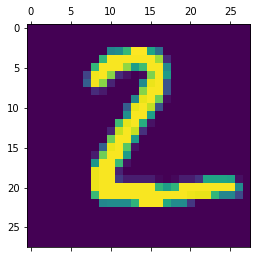

In [76]:
plt.matshow(x_test[1])

In [77]:
predict = model.predict(x_test_flattened)
predict[0]

313/313 [==============================] - 1s 4ms/step


array([2.2040538e-02, 4.6791672e-07, 6.5753400e-02, 9.5862502e-01,
       2.2735817e-03, 1.0834359e-01, 1.5561550e-06, 9.9974281e-01,
       8.7741159e-02, 6.6341162e-01], dtype=float32)

In [78]:
np.argmax(predict[1])

2

In [79]:
y_predicted_lables = [np.argmax(i) for i in predict]
y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [80]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [81]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,   12,  924,   17,    8,    5,   11,    9,   37,    5],
       [   3,    1,   21,  914,    1,   28,    2,   12,   22,    6],
       [   2,    1,    4,    1,  915,    0,    9,    6,   10,   34],
       [  10,    3,    4,   32,    9,  783,   12,    4,   28,    7],
       [  11,    3,    7,    1,    8,   17,  905,    2,    4,    0],
       [   1,    7,   21,    7,    7,    1,    0,  954,    2,   28],
       [   7,   14,    5,   20,    9,   32,    8,   13,  858,    8],
       [  11,    7,    1,   10,   23,    8,    0,   31,    5,  913]])>

Text(69.0, 0.5, 'Truth')

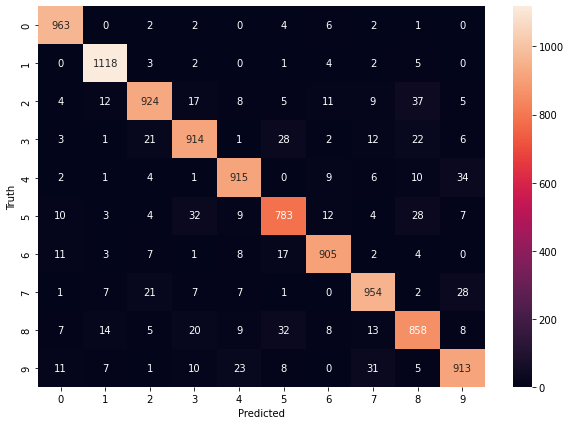

In [82]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2690 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1214 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0848 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9847


In [84]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0863 - accuracy: 0.9740


[0.08631347864866257, 0.9739999771118164]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

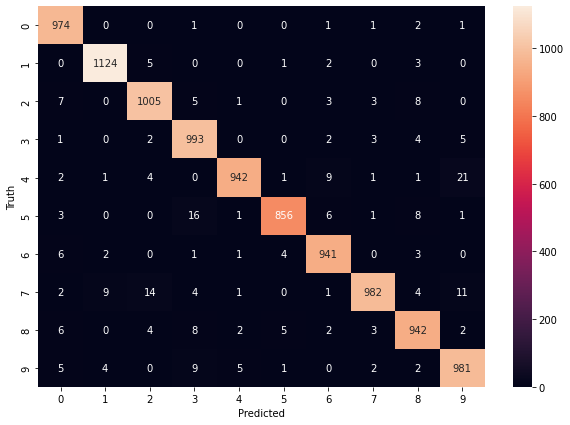

In [85]:
y_predicted = model.predict(x_test_flattened)
y_predicted_lables = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2801 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1270 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0553 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0432 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.021